In [1]:
import math
import random
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy.optimize import curve_fit
import itertools
from itertools import combinations
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import cm
import matplotlib 
%matplotlib inline

In [2]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf');

font = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/Avenir.ttf')

In [3]:
plt.rcParams.update({'text.usetex': True,
                        'font.family': "sans-serif",
                        'text.latex.preamble': r"\usepackage{amsmath}"})

Text(0.5, 0, 's')

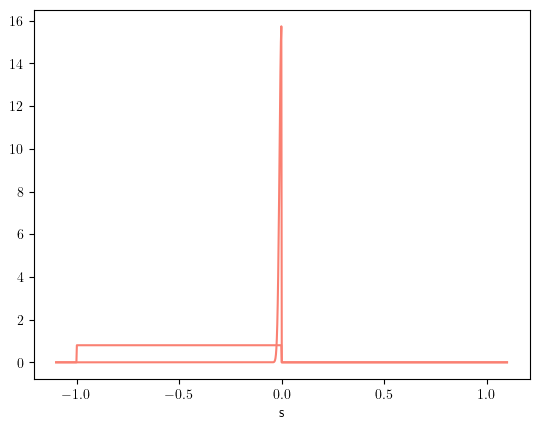

In [4]:
from scipy.stats import truncnorm
from scipy.stats import uniform
from scipy.stats import gamma


x = np.linspace(-1.1, 1.1, 1000)

p = 0.2 # proportion of new mutations that are nearly neutral

neutral_std = 0.01 # scale is sqrt(var)

plt.plot(x, p * truncnorm.pdf(x, -1 / neutral_std, 1e-4 / neutral_std, loc=0, scale=neutral_std), color='salmon') # truncating at 5 stds
plt.plot(x, (1-p) * uniform.pdf(x, loc=-1, scale=1), color='salmon')

#plt.yscale('log')
#plt.xscale('sym')
#plt.xlim(-0.01, 0.01)

plt.xlabel('s')

(-1.0, 0.0)

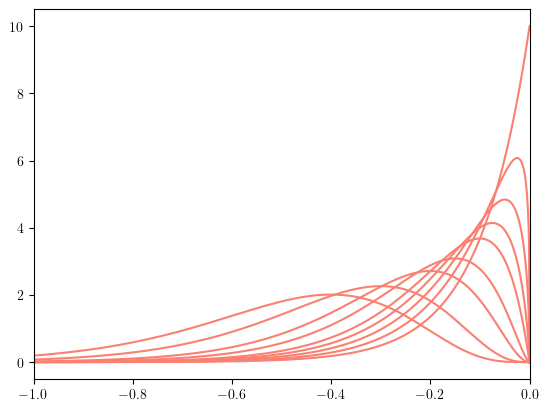

In [5]:
alphas = [1, 1.25, 1.5, 1.75, 2, 2.5, 3, 4, 5]
scales = np.logspace(-5, 0, 50)

scale = 0.1
for a in alphas:
    
    x = np.linspace(0, 1, 1000)
    
    # the beta parameter in wikipedia is 1/scale
    norm = gamma.cdf(1, a, scale=scale) # rescaling such that it integrates to 1
    plt.plot(-x, gamma.pdf(x, a, scale=scale) / norm, 'salmon')
    
plt.xlim(-1, 0)

In [6]:
sp.stats.norm.ppf(0.99, 0, 1) # gives the x coordinate 

2.3263478740408408

In [7]:
# total H will be the integral over s of the empirical H(s) * f(s) ds; need to find the right ds?

In [8]:
# from Mateusz -- need to figure out where these came from
H_sbs = 0.00057
H_rns = 0.00087

In [9]:
columns = ['s', 'total_1', 'het2pq', 'homo', 'sample_total_1', 'sample_het2pq', 'sample_homo', 'total_1', 'het2pq', 'homo', 'sample_total_1', 'sample_het2pq', 'sample_homo']

print(columns[0], columns[8], columns[11]) # 2 5

s het2pq sample_het2pq


In [10]:
# reading simulation results

with open('SBS_h0.txt') as o:
    sbs_h0_lines = [list(map(float, x.strip('\n').split('\t'))) for x in o.readlines()[3:]]

sbs_h0_s_het_dict = dict(zip([x[0] / 10 for x in sbs_h0_lines], [x[8] for x in sbs_h0_lines]))


with open('RNS_h0.txt') as o:
    rns_h0_lines = [list(map(float, x.strip('\n').split('\t'))) for x in o.readlines()[3:]]

rns_h0_s_het_dict = dict(zip([x[0] / 100 for x in rns_h0_lines], [x[2] for x in rns_h0_lines]))


with open('SBS_h05.txt') as o:
    sbs_h05_lines = [list(map(float, x.strip('\n').split('\t'))) for x in o.readlines()[3:]]

sbs_h05_s_het_dict = dict(zip([x[0] / 10 for x in sbs_h05_lines], [x[8] for x in sbs_h05_lines]))


with open('RNS_h05.txt') as o:
    rns_h05_lines = [list(map(float, x.strip('\n').split('\t'))) for x in o.readlines()[3:]]

rns_h05_s_het_dict = dict(zip([x[0] / 100 for x in rns_h05_lines], [x[2] for x in rns_h05_lines]))

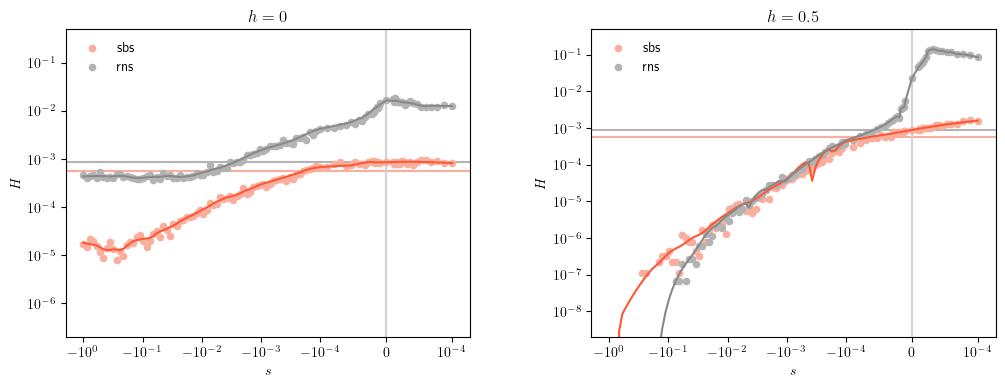

In [11]:
fig = plt.figure(figsize=(12, 4))

grid = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.3,
                         height_ratios=[1], hspace=0.1)
for c in range(2):
    plt.subplot(grid[c // 2, c % 2])
    
    if c == 0:
        
        H_sbs_h0_lowess = sm.nonparametric.lowess(endog = [x[8] for x in sbs_h0_lines], exog = [x[0] / 10 for x in sbs_h0_lines], frac=0.1)
        plt.plot([x[0] for x in H_sbs_h0_lowess], [x[1] for x in H_sbs_h0_lowess], color='#ff5733')
        #plt.plot([x[0] for x in H_sbs_h0_lowess], [1.3*x[1] for x in H_sbs_h0_lowess], '--', color='#ff5733')
        #plt.plot([x[0] for x in H_sbs_h0_lowess], [0.7*x[1] for x in H_sbs_h0_lowess], '--', color='#ff5733')

        plt.scatter([x[0] / 10  for x in sbs_h0_lines], [x[8] for x in sbs_h0_lines], s=20, color='#faae9d', label='sbs')
        #plt.scatter([x[0] / 10  for x in sbs_h0_lines], [x[11] for x in sbs_h0_lines], s=20, facecolors='none', edgecolors='#faae9d', label='sbs (sample)')


        H_rns_h0_lowess = sm.nonparametric.lowess(endog = [x[2] for x in rns_h0_lines], exog = [x[0] / 100 for x in rns_h0_lines], frac=0.1)
        plt.plot([x[0] for x in H_rns_h0_lowess], [x[1] for x in H_rns_h0_lowess], color='#898989')
        #plt.plot([x[0] for x in H_rns_h0_lowess], [1.3*x[1] for x in H_rns_h0_lowess], '--', color='#898989')
        #plt.plot([x[0] for x in H_rns_h0_lowess], [0.7*x[1] for x in H_rns_h0_lowess], '--', color='#898989')

        plt.scatter([x[0] / 100 for x in rns_h0_lines], [x[2] for x in rns_h0_lines], s=20, color='#b3b3b3', label='rns')
        #plt.scatter([x[0] / 100 for x in rns_h0_lines], [x[5] for x in rns_h0_lines], s=20, facecolors='none', edgecolors='#b3b3b3', label='rns (sample)')

        plt.axhline(H_rns, color='#b3b3b3', zorder=-1)
        plt.axhline(H_sbs, color='#faae9d', zorder=-1)

        plt.axvline(0, color='#d3d3d3', zorder=-1)

        plt.yscale('log'); plt.xscale('symlog', linthresh=1e-4);
        plt.minorticks_off()

        #xs = np.linspace(-2e1, -0.5e-5, 100)
        #plt.plot(xs, [5e-6 / math.sqrt(-x) for x in xs], ':', color='salmon')
        #plt.plot(xs, [5e-5 / math.sqrt(-x) for x in xs], ':', color='#898989')

        # for legend
        #plt.plot([1e-8, 1e-7], [1e-8, 1e1], ':', color='black', label=r"$H \propto x^{-1/2}$")

        plt.xlim(-2e0, 2e-4);
        plt.ylim(2e-7, 5e-1);

        plt.legend(frameon=False, fontsize=10, loc='upper left');
        plt.title(r"$h=0$")

        plt.xlabel(r"$s$");
        plt.ylabel(r"$H$");
        
    elif c == 1:
        
        H_sbs_h05_lowess = sm.nonparametric.lowess(endog = [x[8] for x in sbs_h05_lines], exog = [x[0] / 10 for x in sbs_h05_lines], frac=0.3)
        plt.plot([x[0] for x in H_sbs_h05_lowess], [x[1] for x in H_sbs_h05_lowess], color='#ff5733')
        #plt.plot([x[0] for x in H_sbs_h05_lowess], [1.3*x[1] for x in H_sbs_h05_lowess], '--', color='#ff5733')
        #plt.plot([x[0] for x in H_sbs_h05_lowess], [0.7*x[1] for x in H_sbs_h05_lowess], '--', color='#ff5733')

        plt.scatter([x[0] / 10  for x in sbs_h05_lines], [x[8] for x in sbs_h05_lines], s=20, color='#faae9d', label='sbs')
        #plt.scatter([x[0] / 10  for x in sbs_h05_lines], [x[11] for x in sbs_h05_lines], s=20, facecolors='none', edgecolors='#faae9d', label='sbs (sample)')


        H_rns_h05_lowess = sm.nonparametric.lowess(endog = [x[2] for x in rns_h05_lines], exog = [x[0] / 100 for x in rns_h05_lines], frac=0.1)
        plt.plot([x[0] for x in H_rns_h05_lowess], [x[1] for x in H_rns_h05_lowess], color='#898989')
        #plt.plot([x[0] for x in H_rns_h05_lowess], [1.3*x[1] for x in H_rns_h05_lowess], '--', color='#898989')
        #plt.plot([x[0] for x in H_rns_h05_lowess], [0.7*x[1] for x in H_rns_h05_lowess], '--', color='#898989')

        plt.scatter([x[0] / 100 for x in rns_h05_lines], [x[2] for x in rns_h05_lines], s=20, color='#b3b3b3', label='rns')
        #plt.scatter([x[0] / 100 for x in rns_h05_lines], [x[5] for x in rns_h05_lines], s=20, facecolors='none', edgecolors='#b3b3b3', label='rns (sample)')
        
        plt.axhline(H_rns, color='#b3b3b3', zorder=-1)
        plt.axhline(H_sbs, color='#faae9d', zorder=-1)

        plt.axvline(0, color='#d3d3d3', zorder=-1)

        plt.yscale('log'); plt.xscale('symlog', linthresh=1e-4);
        plt.minorticks_off()
        
        plt.xlim(-2e0, 2e-4);
        plt.ylim(2e-9, 5e-1);

        plt.legend(frameon=False, fontsize=10, loc='upper left');
        plt.title(r"$h=0.5$")

        plt.xlabel(r"$s$");
        plt.ylabel(r"$H$");
        
plt.savefig('H_s.png', dpi=300, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/tx/csqkm8hn6m545sd3k1rjf6p80000gn/T/ipykernel_29910/4219716961.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  ys = [(H_sbs_h05_lowess_interp[i] / H_sbs) / (H_rns_h05_lowess_interp[i] / H_rns) for i in range(len(s))]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


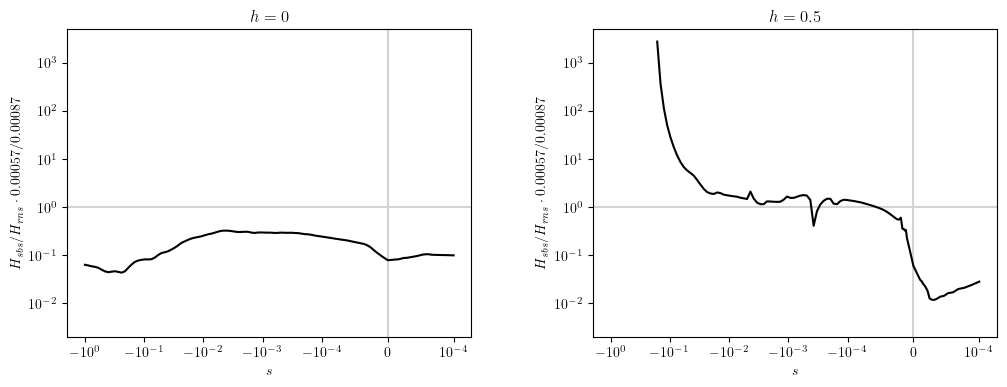

In [12]:
fig = plt.figure(figsize=(12, 4))

grid = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.3,
                         height_ratios=[1], hspace=0.1)

s = (list(np.logspace(-4, -5, 19)) + [0] + list(-1 * np.logspace(-5, 0, 90)))[::-1]

for c in range(2):
    plt.subplot(grid[c // 2, c % 2])
    
    if c == 0:
        
        H_sbs_h0_lowess = sm.nonparametric.lowess(endog = [x[8] for x in sbs_h0_lines], exog = [x[0] / 10 for x in sbs_h0_lines], frac=0.1)
        H_sbs_h0_lowess_interp = np.interp(s, [x[0] for x in H_sbs_h0_lowess], [x[1] for x in H_sbs_h0_lowess])
    
        H_rns_h0_lowess = sm.nonparametric.lowess(endog = [x[2] for x in rns_h0_lines], exog = [x[0] / 100 for x in rns_h0_lines], frac=0.1)
        H_rns_h0_lowess_interp = np.interp(s, [x[0] for x in H_rns_h0_lowess], [x[1] for x in H_rns_h0_lowess]) 
        
        ys = [(H_sbs_h0_lowess_interp[i] / H_sbs) / (H_rns_h0_lowess_interp[i] / H_rns) for i in range(len(s))]
        plt.plot(s, ys, color='black')

        plt.axvline(0, color='#d3d3d3', zorder=-1)
        plt.axhline(1, color='#d3d3d3', zorder=-1)

        plt.yscale('log'); plt.xscale('symlog', linthresh=1e-4);
        plt.minorticks_off()
        
        plt.xlim(-2e0, 2e-4);
        plt.ylim(2e-3, 5e3);

        plt.legend(frameon=False, fontsize=10, loc='upper left');
        plt.title(r"$h=0$")

        plt.xlabel(r"$s$");
        plt.ylabel(r"$H_{sbs}/H_{rns} \cdot 0.00057 / 0.00087$");
        
    elif c == 1:
        
        H_sbs_h05_lowess = sm.nonparametric.lowess(endog = [x[8] for x in sbs_h05_lines], exog = [x[0] / 10 for x in sbs_h05_lines], frac=0.3)
        H_sbs_h05_lowess_interp = np.interp(s, [x[0] for x in H_sbs_h05_lowess], [x[1] for x in H_sbs_h05_lowess])
    
        H_rns_h05_lowess = sm.nonparametric.lowess(endog = [x[2] for x in rns_h05_lines], exog = [x[0] / 100 for x in rns_h05_lines], frac=0.1)
        H_rns_h05_lowess_interp = np.interp(s, [x[0] for x in H_rns_h05_lowess], [x[1] for x in H_rns_h05_lowess]) 
        
        ys = [(H_sbs_h05_lowess_interp[i] / H_sbs) / (H_rns_h05_lowess_interp[i] / H_rns) for i in range(len(s))]
        plt.plot(s, ys, color='black')

        plt.axvline(0, color='#d3d3d3', zorder=-1)
        plt.axhline(1, color='#d3d3d3', zorder=-1)

        plt.yscale('log'); plt.xscale('symlog', linthresh=1e-4);
        plt.minorticks_off()
        
        plt.xlim(-2e0, 2e-4);
        plt.ylim(2e-3, 5e3);

        plt.legend(frameon=False, fontsize=10, loc='upper left');
        plt.title(r"$h=0.5$")

        plt.xlabel(r"$s$");
        plt.ylabel(r"$H_{sbs}/H_{rns} \cdot 0.00057 / 0.00087$");
        
plt.savefig('relative_H_s.png', dpi=300, bbox_inches='tight')

In [13]:
#s = (list(np.logspace(-4, -5, 19)) + [0] + list(-1 * np.logspace(-5, 0, 90)))[::-1]

#with open('s.txt', 'w+') as o:
#    o.writelines(['{:.17f}'.format(x) + '\n' for x in s])

In [14]:
# rewriting for a gamma distribution

def H(alpha, scale, s, H_s, H_s_recessive_lethal, frac_lethal):
    # s are the s values where H values were computed
    # the beta parameter in wikipedia is 1/scale
    
    # will need to take abs(x) for the gamma function
    # increasing the length will increase presicion
    xs = ([0] + list(-1 * np.logspace(-10, 0, int(1e5))))[::-1] 
    
    # interpolating H(s)
    H_s_interp = np.interp(xs, s, H_s)
    
    # getting pdf values
    norm = gamma.cdf(1, alpha, scale=scale) # rescaling such that it integrates to 1
    pdf = (1 - frac_lethal) * gamma.pdf([abs(x) for x in xs], alpha, scale=scale) / norm
        
    I = frac_lethal * H_s_recessive_lethal
    tmp = 0 # checking that the mixture integrates to 1
        
    for i in range(len(xs) - 1):
        
        I += (xs[i + 1] - xs[i]) * H_s_interp[i] * pdf[i]
        tmp += (xs[i + 1] - xs[i]) * pdf[i]
        
    return I, tmp   

In [15]:
s = (list(np.logspace(-4, -5, 19)) + [0] + list(-1 * np.logspace(-5, 0, 90)))[::-1]
H_sbs_recessive_lethal = np.interp(-1e-2, s, [x[1] for x in H_sbs_h0_lowess])
H_rns_recessive_lethal = np.interp(-1e-2, s, [x[1] for x in H_rns_h0_lowess])

H(100, 1e-7, s, [x[1] for x in H_sbs_h05_lowess], H_sbs_recessive_lethal, 0.1)

(0.0007524772964543671, 0.899896390587187)

In [21]:
# making a grid of parameters:
fracs = [0, 0.1, 0.2, 0.3]
alphas = [1, 3, 10, 30, 100, 300]
scales = np.logspace(-7, -3, 20)

s = (list(np.logspace(-4, -5, 19)) + [0] + list(-1 * np.logspace(-5, 0, 90)))[::-1] # where H was simulated
H_sbs_h05_lowess = sm.nonparametric.lowess(endog = [x[8] for x in sbs_h05_lines], exog = [x[0] / 10 for x in sbs_h05_lines], frac=0.3)    
H_rns_h05_lowess = sm.nonparametric.lowess(endog = [x[2] for x in rns_h05_lines], exog = [x[0] / 100 for x in rns_h05_lines], frac=0.1)
H_sbs_recessive_lethal = np.interp(-1e-2, s, [x[1] for x in H_sbs_h0_lowess])
H_rns_recessive_lethal = np.interp(-1e-2, s, [x[1] for x in H_rns_h0_lowess])

# calculating H on the grid:

H_sbs_out = {}
H_rns_out = {}

for frac in fracs:
    H_sbs_out[frac] = {}
    H_rns_out[frac] = {}
    
    for alpha in alphas:
        H_sbs_out[frac][alpha] = [[], [], [], []] # scale, H, H w/ lower simulated H, H w/ higher simulated H
        H_rns_out[frac][alpha] = [[], [], [], []] # scale, H, H w/ lower simulated H, H w/ higher simulated H
    
        for scale in scales:
            H_sbs_out[frac][alpha][0].append(scale)
            H_sbs_out[frac][alpha][1].append(H(alpha, scale, s, [x[1] for x in H_sbs_h05_lowess], H_sbs_recessive_lethal, frac)[0])
            H_sbs_out[frac][alpha][2].append(H(alpha, scale, s, [0.7*x[1] for x in H_sbs_h05_lowess], H_sbs_recessive_lethal, frac)[0])
            H_sbs_out[frac][alpha][3].append(H(alpha, scale, s, [1.3*x[1] for x in H_sbs_h05_lowess], H_sbs_recessive_lethal, frac)[0])
        
            H_rns_out[frac][alpha][0].append(scale)
            H_rns_out[frac][alpha][1].append(H(alpha, scale, s, [x[1] for x in H_rns_h05_lowess], H_rns_recessive_lethal, frac)[0])
            H_rns_out[frac][alpha][2].append(H(alpha, scale, s, [0.7*x[1] for x in H_rns_h05_lowess], H_rns_recessive_lethal, frac)[0])
            H_rns_out[frac][alpha][3].append(H(alpha, scale, s, [1.3*x[1] for x in H_rns_h05_lowess], H_rns_recessive_lethal, frac)[0])
    


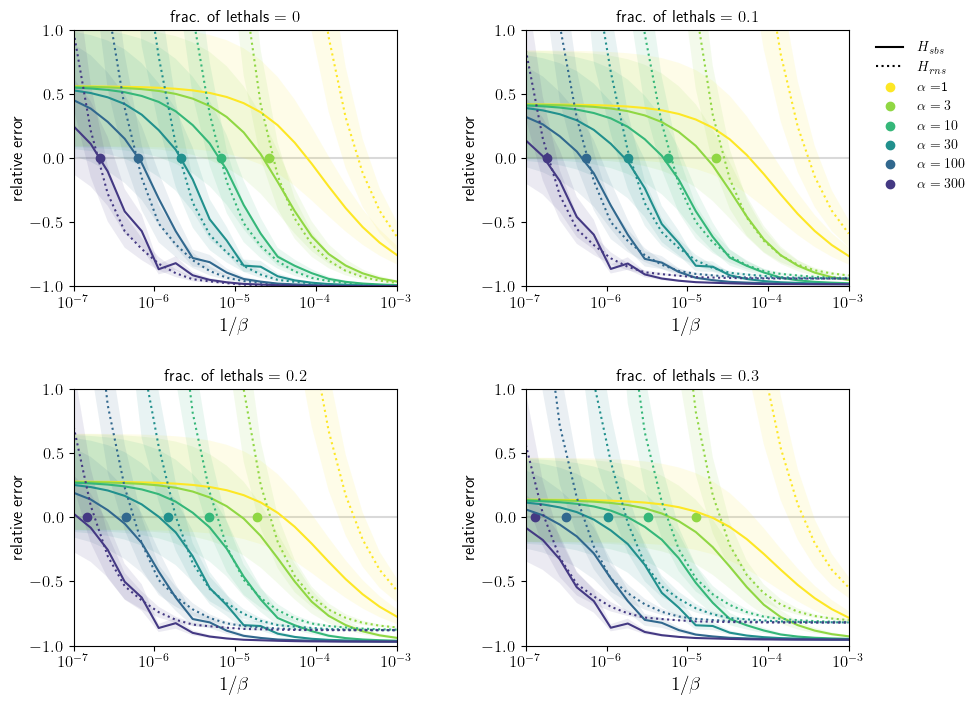

In [22]:
colors = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0, vmax=len(alphas)), 
                                      cmap=plt.get_cmap('viridis_r'))

grid = gridspec.GridSpec(ncols=2, nrows=2,
                         width_ratios=[1, 1], wspace=0.4,
                         height_ratios=[1, 1], hspace=0.4)

fig = plt.figure(figsize=(10, 8))

params_that_fit = {} # alpha, scale for each frac 

for c, frac in enumerate(fracs):
    plt.subplot(grid[c // 2, c % 2])


    # for legend
    plt.plot([1, 10], [0, 0], color='black', label=r"$H_{sbs}$")
    plt.plot([1, 10], [0, 0], ':', color='black', label=r"$H_{rns}$")

    params_that_fit[frac] = [] # alpha, scale
    scales_interp = np.logspace(-7, -3, 1000)
    
    for i, alpha in enumerate(alphas):

        plt.plot(scales, [(H_sbs_out[frac][alpha][1][j] - H_sbs) / H_sbs for j in range(len(scales))], 
                 color=colors.to_rgba(i))
        plt.plot(scales, [(H_rns_out[frac][alpha][1][j] - H_rns) / H_rns for j in range(len(scales))], 
                 ':', color=colors.to_rgba(i))
        
        # plotting error range
        plt.fill_between(scales, [(H_sbs_out[frac][alpha][2][j] - H_sbs) / H_sbs for j in range(len(scales))], [(H_sbs_out[frac][alpha][3][j] - H_sbs) / H_sbs for j in range(len(scales))],
                         color=colors.to_rgba(i), alpha=0.1, edgecolor=None)
        plt.fill_between(scales, [(H_rns_out[frac][alpha][2][j] - H_rns) / H_rns for j in range(len(scales))], [(H_rns_out[frac][alpha][3][j] - H_rns) / H_rns for j in range(len(scales))],
                         color=colors.to_rgba(i), alpha=0.1, edgecolor=None)
        
        # figuring out which parameters fit
                
        errors_sbs_interp = np.interp(scales_interp, scales, [(H_sbs_out[frac][alpha][3][j] - H_sbs) / H_sbs for j in range(len(scales))])
        errors_sbs_interp_tuples = zip(scales_interp, [abs(x) for x in errors_sbs_interp])
        scale_sbs_upper_err = [x[0] for x in errors_sbs_interp_tuples if x[1] == min([abs(y) for y in errors_sbs_interp])]
    
        errors_rns_interp = np.interp(scales_interp, scales, [(H_rns_out[frac][alpha][2][j] - H_rns) / H_rns for j in range(len(scales))])
        errors_rns_interp_tuples = zip(scales_interp, [abs(x) for x in errors_rns_interp])
        scale_rns_lower_err = [x[0] for x in errors_rns_interp_tuples if x[1] == min([abs(y) for y in errors_rns_interp])]
        
        # if there is no overlap within the error range
        if scale_sbs_upper_err[0] - scale_rns_lower_err[0] <= 0:
        
            plt.scatter(1, 0, color=colors.to_rgba(i), label=r"$\alpha = $" + str(alpha))
            
        else:
            
            errors_rns_interp = np.interp(scales_interp, scales, [(H_rns_out[frac][alpha][1][j] - H_rns) / H_rns for j in range(len(scales))])
            errors_rns_interp_tuples = zip(scales_interp, [abs(x) for x in errors_rns_interp])
            scale_rns = [x[0] for x in errors_rns_interp_tuples if x[1] == min([abs(y) for y in errors_rns_interp])]

            errors_sbs_interp = np.interp(scales_interp, scales, [(H_sbs_out[frac][alpha][1][j] - H_sbs) / H_sbs for j in range(len(scales))])
            errors_sbs_interp_tuples = zip(scales_interp, [abs(x) for x in errors_sbs_interp])
            scale_sbs = [x[0] for x in errors_sbs_interp_tuples if x[1] == min([abs(y) for y in errors_sbs_interp])]
            
            #plt.scatter(math.sqrt(scale_sbs[0]*scale_rns[0]), 0, color=colors.to_rgba(i), label=r"$\alpha = " + str(alpha) + "$")
            #params_that_fit[frac].append([alpha, math.sqrt(scale_sbs[0]*scale_rns[0])])
            
            plt.scatter(math.sqrt(scale_rns[0]*scale_sbs[0]), 0, color=colors.to_rgba(i), label=r"$\alpha = " + str(alpha) + "$")
            params_that_fit[frac].append([alpha, math.sqrt(scale_rns[0]*scale_sbs[0])])
    
    plt.axhline(0, color='#d9d9d9', zorder=-1)

    plt.xscale('log');
    #plt.yscale('log');
    plt.minorticks_off()

    plt.ylim(-1, 1)
    plt.xlim(1e-7, 1e-3)

    plt.yticks([-1, -0.5, 0, 0.5, 1], size=12)
    plt.xticks([1e-7, 1e-6, 1e-5, 1e-4, 1e-3], size=12)

    plt.xlabel(r"$1/\beta$", size=14);
    plt.ylabel(r"$\text{relative error}$", size=12);
    plt.title('frac. of lethals = ' + r"$" + str(frac) + "$")

    if c == 1:
        plt.legend(frameon=False, ncol=1, handletextpad=1, bbox_to_anchor=(1.4, 1));

    plt.savefig('gamma_relative_error.png', dpi=300, bbox_inches='tight')

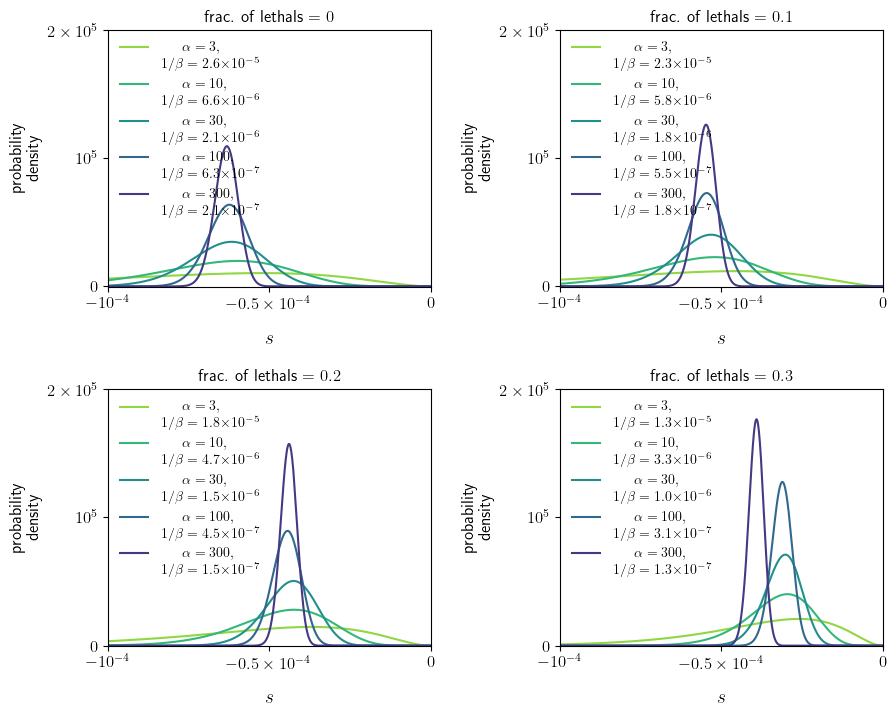

In [23]:
grid = gridspec.GridSpec(ncols=2, nrows=2,
                         width_ratios=[1, 1], wspace=0.4,
                         height_ratios=[1, 1], hspace=0.4)

fig = plt.figure(figsize=(10, 8))

for c, frac in enumerate(fracs):
    plt.subplot(grid[c // 2, c % 2])

    for p in params_that_fit[frac]:
    
        alpha = p[0]
        scale = p[1]
    
        scale_str = "{0:.{1:d}e}".format(scale, 1)
        a, b = scale_str.split("e")
        b = str(int(b))
    
        x = np.linspace(0, 0.0001, int(1e4))
        c = colors.to_rgba([x[0] for x in list(enumerate(alphas)) if x[1] == alpha])
    
        # the beta parameter in wikipedia is 1/scale
        norm = gamma.cdf(1, alpha, scale=scale) # rescaling such that it integrates to 1
        plt.plot(-x, gamma.pdf(x, alpha, scale=scale) / norm, color=c, label=r"$\alpha = " + str(alpha) + "$" + r"$, \\ 1/\beta = " + a + "$" + r"$\times10^{" + b + "}$")
    
    plt.ylim(-100, 20100)
    plt.xlim(-1e-4, 0)

    plt.yticks([0, 100000, 200000], [r"$0$", r"$10^5$", r"$2\times10^5$"], size=12)
    plt.xticks([-1e-4, 0.5 * -1e-4, 0], [r"$-10^{-4}$", r"$-0.5\times10^{-4}$", r"$0$"], size=12)

    plt.xlabel(r"$s$", size=14, labelpad=14);
    plt.ylabel(r"$\text{probability}$" + '\n' + r"$\text{density}$", size=12);
    plt.title('frac. of lethals = ' + r"$" + str(frac) + "$")

    plt.legend(frameon=False, ncol=1, handletextpad=1, loc='upper left');

plt.savefig('gamma_distr.png', dpi=300, bbox_inches='tight')
    

In [24]:
params_that_fit

{0: [[3, 2.608653617622548e-05],
  [10, 6.634708121092351e-06],
  [30, 2.124845352498881e-06],
  [100, 6.292146109610344e-07],
  [300, 2.1102034285685945e-07]],
 0.1: [[3, 2.2717281330269024e-05],
  [10, 5.777790117970507e-06],
  [30, 1.8334254825622905e-06],
  [100, 5.504789807854973e-07],
  [300, 1.8292045048462918e-07]],
 0.2: [[3, 1.8461469463245454e-05],
  [10, 4.695390010680063e-06],
  [30, 1.46273335620113e-06],
  [100, 4.473533054498468e-07],
  [300, 1.4661086840469843e-07]],
 0.3: [[3, 1.294529978227916e-05],
  [10, 3.277294849923382e-06],
  [30, 1.0399609139541203e-06],
  [100, 3.13686982456688e-07],
  [300, 1.3065201621247213e-07]]}

In [ ]:
norm = gamma.cdf(1, 3, scale=1.294529978227916e-05) # rescaling such that it integrates to 1
(gamma.cdf(0, 3, scale=1.294529978227916e-05) - gamma.cdf(1e-6, 3, scale=1.294529978227916e-05)) / norm

In [ ]:
# rewriting for a gamma distribution

def H(alpha, scale, s, H_s, H_s_recessive_lethal, frac_lethal, frac_neutral):
    # s are the s values where H values were computed
    # the beta parameter in wikipedia is 1/scale
    
    # will need to take abs(x) for the gamma function
    # increasing the length will increase presicion
    xs = ([0] + list(-1 * np.logspace(-10, 0, int(1e5))))[::-1] 
    
    # interpolating H(s)
    H_s_interp = np.interp(xs, s, H_s)
    H_rns_neutral = np.interp(-1e-6, s, H_s)
    
    # getting pdf values
    norm = gamma.cdf(1, alpha, scale=scale) # rescaling such that it integrates to 1
    pdf = (1 - frac_lethal - frac_neutral) * gamma.pdf([abs(x) for x in xs], alpha, scale=scale) / norm
        
    I = frac_lethal * H_s_recessive_lethal + frac_neutral * H_rns_neutral 
    tmp = 0 # checking that the mixture integrates to 1
        
    for i in range(len(xs) - 1):
        
        I += (xs[i + 1] - xs[i]) * H_s_interp[i] * pdf[i]
        tmp += (xs[i + 1] - xs[i]) * pdf[i]
        
    return I, tmp   

In [ ]:
s = (list(np.logspace(-4, -5, 19)) + [0] + list(-1 * np.logspace(-5, 0, 90)))[::-1]
H_sbs_recessive_lethal = np.interp(-1e-2, s, [x[1] for x in H_sbs_h0_lowess])
H_rns_recessive_lethal = np.interp(-1e-2, s, [x[1] for x in H_rns_h0_lowess])

H(100, 1e-7, s, [x[1] for x in H_sbs_h05_lowess], H_sbs_recessive_lethal, 0.1, 0.1)

In [ ]:
# making a grid of parameters:
fracs = [0, 0.1, 0.2, 0.3]
alphas = [1, 3, 10, 30, 100, 300]
scales = np.logspace(-7, -3, 20)
frac_neutral = 0.1

s = (list(np.logspace(-4, -5, 19)) + [0] + list(-1 * np.logspace(-5, 0, 90)))[::-1] # where H was simulated
H_sbs_h05_lowess = sm.nonparametric.lowess(endog = [x[8] for x in sbs_h05_lines], exog = [x[0] / 10 for x in sbs_h05_lines], frac=0.3)    
H_rns_h05_lowess = sm.nonparametric.lowess(endog = [x[2] for x in rns_h05_lines], exog = [x[0] / 100 for x in rns_h05_lines], frac=0.1)
H_sbs_recessive_lethal = np.interp(-1e-2, s, [x[1] for x in H_sbs_h0_lowess])
H_rns_recessive_lethal = np.interp(-1e-2, s, [x[1] for x in H_rns_h0_lowess])

# calculating H on the grid:

H_sbs_out = {}
H_rns_out = {}

for frac in fracs:
    H_sbs_out[frac] = {}
    H_rns_out[frac] = {}
    
    for alpha in alphas:
        H_sbs_out[frac][alpha] = [[], [], [], []] # scale, H, H w/ lower simulated H, H w/ higher simulated H
        H_rns_out[frac][alpha] = [[], [], [], []] # scale, H, H w/ lower simulated H, H w/ higher simulated H
    
        for scale in scales:
            H_sbs_out[frac][alpha][0].append(scale)
            H_sbs_out[frac][alpha][1].append(H(alpha, scale, s, [x[1] for x in H_sbs_h05_lowess], H_sbs_recessive_lethal, frac, frac_neutral)[0])
            H_sbs_out[frac][alpha][2].append(H(alpha, scale, s, [0.7*x[1] for x in H_sbs_h05_lowess], H_sbs_recessive_lethal, frac, frac_neutral)[0])
            H_sbs_out[frac][alpha][3].append(H(alpha, scale, s, [1.3*x[1] for x in H_sbs_h05_lowess], H_sbs_recessive_lethal, frac, frac_neutral)[0])
        
            H_rns_out[frac][alpha][0].append(scale)
            H_rns_out[frac][alpha][1].append(H(alpha, scale, s, [x[1] for x in H_rns_h05_lowess], H_rns_recessive_lethal, frac, frac_neutral)[0])
            H_rns_out[frac][alpha][2].append(H(alpha, scale, s, [0.7*x[1] for x in H_rns_h05_lowess], H_rns_recessive_lethal, frac, frac_neutral)[0])
            H_rns_out[frac][alpha][3].append(H(alpha, scale, s, [1.3*x[1] for x in H_rns_h05_lowess], H_rns_recessive_lethal, frac, frac_neutral)[0])
    


In [ ]:
colors = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0, vmax=len(alphas)), 
                                      cmap=plt.get_cmap('viridis_r'))

grid = gridspec.GridSpec(ncols=2, nrows=2,
                         width_ratios=[1, 1], wspace=0.4,
                         height_ratios=[1, 1], hspace=0.4)

fig = plt.figure(figsize=(10, 8))

params_that_fit = {} # alpha, scale for each frac 

for c, frac in enumerate(fracs):
    plt.subplot(grid[c // 2, c % 2])


    # for legend
    plt.plot([1, 10], [0, 0], color='black', label=r"$H_{sbs}$")
    plt.plot([1, 10], [0, 0], ':', color='black', label=r"$H_{rns}$")

    params_that_fit[frac] = [] # alpha, scale
    scales_interp = np.logspace(-7, -3, 1000)
    
    for i, alpha in enumerate(alphas):

        plt.plot(scales, [(H_sbs_out[frac][alpha][1][j] - H_sbs) / H_sbs for j in range(len(scales))], 
                 color=colors.to_rgba(i))
        plt.plot(scales, [(H_rns_out[frac][alpha][1][j] - H_rns) / H_rns for j in range(len(scales))], 
                 ':', color=colors.to_rgba(i))
        
        # plotting error range
        plt.fill_between(scales, [(H_sbs_out[frac][alpha][2][j] - H_sbs) / H_sbs for j in range(len(scales))], [(H_sbs_out[frac][alpha][3][j] - H_sbs) / H_sbs for j in range(len(scales))],
                         color=colors.to_rgba(i), alpha=0.1, edgecolor=None)
        plt.fill_between(scales, [(H_rns_out[frac][alpha][2][j] - H_rns) / H_rns for j in range(len(scales))], [(H_rns_out[frac][alpha][3][j] - H_rns) / H_rns for j in range(len(scales))],
                         color=colors.to_rgba(i), alpha=0.1, edgecolor=None)
        
        # figuring out which parameters fit
                
        errors_sbs_interp = np.interp(scales_interp, scales, [(H_sbs_out[frac][alpha][3][j] - H_sbs) / H_sbs for j in range(len(scales))])
        errors_sbs_interp_tuples = zip(scales_interp, [abs(x) for x in errors_sbs_interp])
        scale_sbs_upper_err = [x[0] for x in errors_sbs_interp_tuples if x[1] == min([abs(y) for y in errors_sbs_interp])]
    
        errors_rns_interp = np.interp(scales_interp, scales, [(H_rns_out[frac][alpha][2][j] - H_rns) / H_rns for j in range(len(scales))])
        errors_rns_interp_tuples = zip(scales_interp, [abs(x) for x in errors_rns_interp])
        scale_rns_lower_err = [x[0] for x in errors_rns_interp_tuples if x[1] == min([abs(y) for y in errors_rns_interp])]
        
        # if there is no overlap within the error range
        if scale_sbs_upper_err[0] - scale_rns_lower_err[0] <= 0:
        
            plt.scatter(1, 0, color=colors.to_rgba(i), label=r"$\alpha = $" + str(alpha))
            
        else:
            
            errors_rns_interp = np.interp(scales_interp, scales, [(H_rns_out[frac][alpha][1][j] - H_rns) / H_rns for j in range(len(scales))])
            errors_rns_interp_tuples = zip(scales_interp, [abs(x) for x in errors_rns_interp])
            scale_rns = [x[0] for x in errors_rns_interp_tuples if x[1] == min([abs(y) for y in errors_rns_interp])]

            errors_sbs_interp = np.interp(scales_interp, scales, [(H_sbs_out[frac][alpha][1][j] - H_sbs) / H_sbs for j in range(len(scales))])
            errors_sbs_interp_tuples = zip(scales_interp, [abs(x) for x in errors_sbs_interp])
            scale_sbs = [x[0] for x in errors_sbs_interp_tuples if x[1] == min([abs(y) for y in errors_sbs_interp])]
            
            #plt.scatter(math.sqrt(scale_sbs[0]*scale_rns[0]), 0, color=colors.to_rgba(i), label=r"$\alpha = " + str(alpha) + "$")
            #params_that_fit[frac].append([alpha, math.sqrt(scale_sbs[0]*scale_rns[0])])
            
            plt.scatter(math.sqrt(scale_rns[0]*scale_sbs[0]), 0, color=colors.to_rgba(i), label=r"$\alpha = " + str(alpha) + "$")
            params_that_fit[frac].append([alpha, math.sqrt(scale_rns[0]*scale_sbs[0])])
    
    plt.axhline(0, color='#d9d9d9', zorder=-1)

    plt.xscale('log');
    #plt.yscale('log');
    plt.minorticks_off()

    plt.ylim(-1, 1)
    plt.xlim(1e-7, 1e-3)

    plt.yticks([-1, -0.5, 0, 0.5, 1], size=12)
    plt.xticks([1e-7, 1e-6, 1e-5, 1e-4, 1e-3], size=12)

    plt.xlabel(r"$1/\beta$", size=14);
    plt.ylabel(r"$\text{relative error}$", size=12);
    plt.title('frac. of lethals = ' + r"$" + str(frac) + "$")

    if c == 1:
        plt.legend(frameon=False, ncol=1, handletextpad=1, bbox_to_anchor=(1.4, 1));

    plt.savefig('gamma_relative_error.png', dpi=300, bbox_inches='tight')

In [ ]:
grid = gridspec.GridSpec(ncols=2, nrows=2,
                         width_ratios=[1, 1], wspace=0.4,
                         height_ratios=[1, 1], hspace=0.4)

fig = plt.figure(figsize=(10, 8))

for c, frac in enumerate(fracs):
    plt.subplot(grid[c // 2, c % 2])

    for p in params_that_fit[frac]:
    
        alpha = p[0]
        scale = p[1]
    
        scale_str = "{0:.{1:d}e}".format(scale, 1)
        a, b = scale_str.split("e")
        b = str(int(b))
    
        x = np.linspace(0, 0.0001, int(1e4))
        c = colors.to_rgba([x[0] for x in list(enumerate(alphas)) if x[1] == alpha])
    
        # the beta parameter in wikipedia is 1/scale
        norm = gamma.cdf(1, alpha, scale=scale) # rescaling such that it integrates to 1
        plt.plot(-x, gamma.pdf(x, alpha, scale=scale) / norm, color=c, label=r"$\alpha = " + str(alpha) + "$" + r"$, \\ 1/\beta = " + a + "$" + r"$\times10^{" + b + "}$")
    
    plt.ylim(-100, 20100)
    plt.xlim(-1e-4, 0)

    plt.yticks([0, 100000, 200000], [r"$0$", r"$10^5$", r"$2\times10^5$"], size=12)
    plt.xticks([-1e-4, 0.5 * -1e-4, 0], [r"$-10^{-4}$", r"$-0.5\times10^{-4}$", r"$0$"], size=12)

    plt.xlabel(r"$s$", size=14, labelpad=14);
    plt.ylabel(r"$\text{probability}$" + '\n' + r"$\text{density}$", size=12);
    plt.title('frac. of lethals = ' + r"$" + str(frac) + "$")

    plt.legend(frameon=False, ncol=1, handletextpad=1, loc='upper left');

plt.savefig('gamma_distr.png', dpi=300, bbox_inches='tight')
    

In [ ]:
params_that_fit

In [ ]:
# rewriting for a gamma distribution

def H(p_2, p_3, p_4, p_5, s, H_s, H_s_recessive):
    # these are the fracs of mutations with each selection coefficient -- they must sum to 1! 
    # p_2 are recessive, p_3, p_4, p_5 are semidominant 
    
    # interpolating H(s)
    H_s_interp = np.interp([-1e-3, -1e-4, -1e-5], s, H_s)
    H_s_recessive_interp = np.interp(-1e-2, s, H_s_recessive)
    
    het = p_2 * H_s_recessive_interp + p_3 * H_s_interp[0] + p_4 * H_s_interp[1] + p_5 * H_s_interp[2]
        
    return het

In [ ]:
s = (list(np.logspace(-4, -5, 19)) + [0] + list(-1 * np.logspace(-5, 0, 90)))[::-1]

H(0.1, 0.4, 0.4, 0.1, s, [x[1] for x in H_sbs_h05_lowess], [x[1] for x in H_sbs_h0_lowess])

In [ ]:
p_lethals = 

In [ ]:
# let's imagine that I already have the right H(s) values; then, can integrate

# CHECK THAT THE MIXTURE OF THE TWO DISTRIBUTIONS INTEGRATES OT 1

# this should work in theory -- the only twist would be to smooth the simulation results 
# + interpolate on a denser grid -- this will replace s, H_s_recessive, H_s_semidominant

# then the only thing that I will need to do is to calculate this on a grid of p, std 
# and see if there are two distributions that match the observed values

# can also define a maximum likelihood function??

def H(p_neutral, std_neutral, s, H_s_recessive, H_s_semidominant):
    
    std_lethal = 0.01
    
    norm_neutral_pdf = p_neutral * truncnorm.pdf(s, -1 / std_neutral, 1e-4 / std_neutral, loc=0, scale=std_neutral)
    norm_lethal_pdf = (1 - p_neutral) * truncnorm.pdf(s, -1 / std_neutral, 1e-4 / std_neutral, loc=0, scale=std_lethal)

    I = 0 
    tmp = 0 # checking that the mixture integrates to 1
    
    for i in range(len(s) - 1):
        I += (s[i + 1] - s[i]) * H_s_recessive[i] * norm_lethal_pdf[i]
        I += (s[i + 1] - s[i]) * H_s_semidominant[i] * norm_neutral_pdf[i]
        
        tmp += (s[i + 1] - s[i]) * (norm_lethal_pdf[i] + norm_lethal_pdf[i + 1]) / 2
        tmp += (s[i + 1] - s[i]) * (norm_neutral_pdf[i] + norm_neutral_pdf[i + 1]) / 2
        
    return I, tmp   

In [ ]:
i, tmp = H(0.8, 0.0001, s, [x[1] for x in H_sbs_h0_lowess], [x[1] for x in H_sbs_h05_lowess])

In [ ]:
tmp

In [ ]:
# making a grid of parameters:
ps = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
stds = np.logspace(-2, -5, 19*3)

# calculating H on the grid:

H_sbs_out = {}
for p in ps:
    H_sbs_out[p] = [[], [], [], []] # std, H, H w/ lower simulated H, H w/ higher simulated H
    for std in stds:
        H_sbs_out[p][0].append(std)
        H_sbs_out[p][1].append(H(p, std, s, [x[1] for x in H_sbs_h0_lowess], [x[1] for x in H_sbs_h05_lowess]))
        H_sbs_out[p][2].append(H(p, std, s, [0.7*x[1] for x in H_sbs_h0_lowess], [0.7*x[1] for x in H_sbs_h05_lowess]))
        H_sbs_out[p][3].append(H(p, std, s, [1.3*x[1] for x in H_sbs_h0_lowess], [1.3*x[1] for x in H_sbs_h05_lowess]))

H_rns_out = {}
for p in ps:
    H_rns_out[p] = [[], [], [], []] # std, H, H w/ lower simulated H, H w/ higher simulated H
    for std in stds:
        H_rns_out[p][0].append(std)
        H_rns_out[p][1].append(H(p, std, s, [x[1] for x in H_rns_h0_lowess], [x[1] for x in H_rns_h05_lowess]))
        H_rns_out[p][2].append(H(p, std, s, [0.7*x[1] for x in H_rns_h0_lowess], [0.7*x[1] for x in H_rns_h05_lowess]))
        H_rns_out[p][3].append(H(p, std, s, [1.3*x[1] for x in H_rns_h0_lowess], [1.3*x[1] for x in H_rns_h05_lowess]))


In [ ]:
colors = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0, vmax=len(ps)), 
                                      cmap=plt.get_cmap('viridis'))
for i, p in enumerate(ps):
    #if p not in [0.6, 0.8, 1.0]:
    #    continue
    plt.plot(H_sbs_out[p][0], [(x - H_sbs) / H_sbs for x in H_sbs_out[p][1]], color=colors.to_rgba(i), label='frac. neutral = ' + str(p))
    #plt.fill_between(H_sbs_out[p][0], [(x - H_sbs) / H_sbs for x in H_sbs_out[p][2]], [(x - H_sbs) / H_sbs for x in H_sbs_out[p][3]], color=colors.to_rgba(i), alpha=0.1, edgecolor=None)
    
    plt.plot(H_rns_out[p][0], [(x - H_rns) / H_rns for x in H_rns_out[p][1]], ':', color=colors.to_rgba(i))

plt.axhline(0, color='#d9d9d9', zorder=-1)

plt.xscale('log');
#plt.yscale('log');
plt.minorticks_off()

plt.ylim(-1, 1)
plt.xlim(1e-5, 1e-2)
plt.yticks([-1, -0.5, 0, 0.5, 1])

plt.ylabel('relative error')
plt.xlabel('standard deviation\nof the truncated neutral distribution')

plt.legend(frameon=False, ncol=1, handletextpad=1, bbox_to_anchor=(1.1, 1));

plt.savefig('norm_and_norm.png', dpi=300, bbox_inches='tight')


#plt.title(r'$H_{sbs}$')

In [ ]:
plt.hist(0.9*truncnorm(-1 / 1e-5, 1e-4 / 1e-5, loc=0, scale=1e-5).rvs(size=10000), bins=100, alpha=0.3);
plt.hist(0.9*truncnorm(-1 / 1e-4, 1e-4 / 1e-4, loc=0, scale=1e-4).rvs(size=10000), bins=100, alpha=0.3);

In [ ]:
plt.hist(truncnorm(-1 / 1e-3, 1e-4 / 1e-3, loc=0, scale=1e-3).rvs(size=1000), bins=100, alpha=0.3);

In [ ]:
# let's imagine that I already have the right H(s) values; then, can integrate

# CHECK THAT THE MIXTURE OF THE TWO DISTRIBUTIONS INTEGRATES OT 1

# this should work in theory -- the only twist would be to smooth the simulation results 
# + interpolate on a denser grid -- this will replace s, H_s_recessive, H_s_semidominant

# then the only thing that I will need to do is to calculate this on a grid of p, std 
# and see if there are two distributions that match the observed values

# can also define a maximum likelihood function??

# rewriting for a gamma distribution

def H(p_neutral, std_neutral, s, H_s_recessive, H_s_semidominant):
    # s is where H was evaluated at
    
    #xs = (list(np.logspace(-4, -5, int(1e4))) + [0] + list(-1 * np.logspace(-5, 0, int(1e5))))[::-1]
    xs = ([0] + list(-1 * np.logspace(-5, 0, int(1e4))))[::-1]
    
    # interpolating Hs
    H_s_recessive_interp = np.interp(xs, s, H_s_recessive)
    H_s_semidominant_interp = np.interp(xs, s, H_s_semidominant)
    
    #xs_neg = [xs for xs in xs if xs <= 0]
    #uniform_pdf = (1 - p_neutral) * uniform.pdf(xs_neg, loc=-1, scale=1)
    #norm_pdf = p_neutral * truncnorm.pdf(xs, (-1 - 0) / std_neutral, (0 - 0) / std_neutral, loc=0, scale=std_neutral)
    
    I = 0 
    tmp = 0 # checking that the mixture integrates to 1
    #for i in range(len(xs_neg) - 1):
    #    I += (xs_neg[i + 1] - xs_neg[i]) * H_s_recessive_interp[i] * uniform_pdf[i]
    #    tmp += (xs_neg[i + 1] - xs_neg[i]) * uniform_pdf[i]
    
    for i in range(len(xs) - 1):
        I += (xs[i + 1] - xs[i]) * H_s_semidominant_interp[i] * norm_pdf[i]
        tmp += (xs[i + 1] - xs[i]) * norm_pdf[i]
        
    return I, tmp   

In [ ]:
# making a grid of parameters:
#ps = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
means =  -1 * np.logspace(-4, -5, 5)
stds = np.logspace(-2, -5, 19*2)
p = 1.0

# calculating H on the grid:

H_sbs_out = {}
for mean in means:
    H_sbs_out[mean] = [[], [], [], []] # std, H, H w/ lower simulated H, H w/ higher simulated H
    for std in stds:
        H_sbs_out[mean][0].append(std)
        H_sbs_out[mean][1].append(H(p, mean, std, s, [x[1] for x in H_sbs_h0_lowess], [x[1] for x in H_sbs_h05_lowess])[0])
        #H_sbs_out[p][2].append(H(p, std, s, [0.7*x[1] for x in H_sbs_h0_lowess], [0.7*x[1] for x in H_sbs_h05_lowess])[0])
        #H_sbs_out[p][3].append(H(p, std, s, [1.3*x[1] for x in H_sbs_h0_lowess], [1.3*x[1] for x in H_sbs_h05_lowess])[0])

H_rns_out = {}
for mean in means:
    H_rns_out[mean] = [[], [], [], []] # std, H, H w/ lower simulated H, H w/ higher simulated H
    for std in stds:
        H_rns_out[mean][0].append(std)
        H_rns_out[mean][1].append(H(p, mean, std, s, [x[1] for x in H_rns_h0_lowess], [x[1] for x in H_rns_h05_lowess])[0])
        #H_rns_out[p][2].append(H(p, std, s, [0.7*x[1] for x in H_rns_h0_lowess], [0.7*x[1] for x in H_rns_h05_lowess])[0])
        #H_rns_out[p][3].append(H(p, std, s, [1.3*x[1] for x in H_rns_h0_lowess], [1.3*x[1] for x in H_rns_h05_lowess])[0])
